In [632]:
import pandas as pd
import quandl
import numpy as np
import quandl
import matplotlib.pyplot as plt
import os
import math
import talib

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import xgboost as xgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import operator


#for item in talib.get_functions():
#    print (item)
plt.rc('figure', figsize=(20, 8), dpi=100)
from datetime import datetime

# Data Preprocessing and Dataset building

In [187]:
def date_time_parser(data):
    
    for i in range(len(data)):
        str_ = data[i]
        str_ = str_.strip()
        str_ = str_.split('\'')
        #print (str_)
        if (str_[1] == "99"):
            str_[1] = "1999"
        else:
            str_[1] = "20" + str_[1]

        str_[0] = str_[0].strip()

        if (str_[0] == 'JAN'):
            str_[0] = "01"
        elif(str_[0] == 'FEB'):
            str_[0] = "02"
        elif(str_[0] == 'MAR'):
            str_[0] = "03"
        elif(str_[0] == 'APR'):
            str_[0] = "04"
        elif(str_[0] == 'MAY'):
            str_[0] = "05"
        elif(str_[0] == 'JUN'):
            str_[0] = "06"
        elif(str_[0] == 'JUL'):
            str_[0] = "07"
        elif(str_[0] == 'AUG'):
            str_[0] = "08"
        elif(str_[0] == 'SEP'):
            str_[0] = "09"
        elif(str_[0] == 'OCT'):
            str_[0] = "10"
        elif(str_[0] == 'NOV'):
            str_[0] = "11"
        elif(str_[0] == 'DEC'):
            str_[0] = "12"

        s = str_[1] + "-" + str_[0] + "-15"
        data[i] = s
    
    return data

In [188]:
def data_cleaning(data):
    
    #Convert datatypes from object/string to float and fill missing values with previous values
    for col in data.columns:
        #print (col)
        data[col] = pd.to_numeric(data[col], errors='coerce')
        #data[col] = data[col].fillna(method = "pad")
        data[col] = data[col].fillna(0)

    return data

In [560]:

#os.chdir("//Users//abhishekmukherjee//Desktop")
#print (os.getcwd())

'''
stock_fundamental = pd.read_excel("GS_RatioAnalysis.xlsx", index = 'Date')
stock_name = "GS"
ticker = pd.read_excel("S&P500_Ticker.xlsx", index = False)
os.chdir("//Users//abhishekmukherjee//Desktop//data//PriceVolumeData")
stock = pd.read_excel(stock_name + "-US.xlsx", parse_dates = True)
stock_test = stock.loc[stock['Date'].between('2015-11-27','2018-01-15', inclusive=True)]
#ibm = ibm.loc[ibm['Date'].between('2014-11-27','2018-01-15', inclusive=True)]
#print (goog)
plt.ylabel("Stock Price")
plt.xlabel("Date")
#plt.plot(stock_test["Date"], stock_test['Close'])
plt.plot(stock_test["Date"], stock_test['High'])
plt.plot(stock_test["Date"], stock_test['Low'])
#ht = talib.HT_TRENDLINE(stock['Close'])
#rsi = talib.RSI(stock["Close"], timeperiod=10)
#plt.plot(stock["Date"], rsi)
#ema = talib.EMA(stock["Close"], timeperiod=10)
#sma = talib.ROC(stock["Close"], timeperiod=5)
#plt.plot(stock["Date"], ema)
#plt.plot(stock["Date"], sma)
#talib.MACD(stock["Close"])
mama, fama = talib.MAMA(stock_test["Close"], fastlimit=0.8, slowlimit=0.2)
sar = talib.SAR(stock_test['High'], stock_test['Low'], acceleration=0.7, maximum=0.2)
plt.plot(stock_test["Date"], sar, color = 'r')

stock_fundamental['Date'] = date_time_parser(stock_fundamental['Date'])
date_pd = stock_fundamental['Date']
stock_fundamental = stock_fundamental.set_index(['Date'])
stock_fundamental.index = pd.to_datetime(stock_fundamental.index)
stock_fundamental = data_cleaning(stock_fundamental)
stock_fundamental = stock_fundamental.resample("D").asfreq().ffill()
#print (stock_fundamental.columns())
os.chdir("//Users//abhishekmukherjee//Desktop")
#stock_fundamental.to_excel("GS_FundamentalRatios.xlsx")
#plt.plot(date_pd[7245 - 81:-1], stock_fundamental['EPS (recurring)'][7245 - 81:-1])
#stock_fundamental_test["EPS (recurring)"].plot()
#print (data.resample("D").asfreq().ffill())
'''

'''
df_analyst = pd.read_excel("GS_YearlyAnalystEstimate.xlsx", index = 'Date')
df_analyst['Date'] = date_time_parser(df_analyst['Date'])
date_pd = df_analyst['Date']
df_analyst = df_analyst.set_index(['Date'])
df_analyst.index = pd.to_datetime(df_analyst.index)
df_analyst = data_cleaning(df_analyst)
df_analyst = df_analyst.resample("D").asfreq().ffill()
print (df_analyst)
'''

os.chdir("//Users//abhishekmukherjee//Desktop//GS_Fundamentals")
'''
df = pd.read_excel("GS_UseOfCash.xlsx", index = 'Date')
df['Date'] = date_time_parser(df['Date'])
date_pd = df['Date']
df = df.set_index(['Date'])
df.index = pd.to_datetime(df.index)
df = data_cleaning(df)
df = df.resample("D").asfreq().ffill()
#print (df.columns)
'''
df_orig = pd.read_excel("GS_FinalDataset.xlsx").set_index(['Date'])
df_1 = pd.read_excel("GS_BalanceSheet_cleaned.xlsx").set_index(['Date'])
df_2 = pd.read_excel("GS_CashflowStatement_cleaned.xlsx").set_index(['Date'])
df_3 = pd.read_excel("GS_IncomeStatement_cleaned.xlsx").set_index(['Date'])
df_4 = pd.read_excel("GS_UseOfCash_cleaned.xlsx").set_index(['Date'])

df_t1 = pd.merge(df_orig, df_1, how='inner', on='Date')
df_t2 = pd.merge(df_t1, df_2, how='inner', on='Date')
df_t3 = pd.merge(df_t2, df_3, how='inner', on='Date')
df_t4 = pd.merge(df_t3, df_4, how='inner', on='Date')

df_t4.columns

Index(['Close', 'Volume', 'Change', '% Change', '% Return',
       'Total Return (Gross)', 'Cumulative Return %', 'Open', 'High', 'Low',
       ...
       'Cash Received (Paid) from Debt Activity', 'Common Dividends_y',
       'Preferred Dividends.1', 'Dividends Paid',
       'Equity Issuance/Option Exercise Proceeds',
       'Repurchase of Common/Preferred Stock',
       'Cash Received (Paid) from Change in Equity', 'Exchange Rate Effect',
       'Net Change in Cash (FX Adjusted)', 'Cash on Balance Sheet'],
      dtype='object', length=342)

In [561]:
#df.to_excel("GS_BalanceSheet_cleaned.xlsx")
#df.to_excel("GS_UseOfCash_cleaned.xlsx")

df_t4.to_excel("GS_FinalData_Update.xlsx")
'''
df_temp = df.copy()
del df_temp['Book Value per Share']
del df_temp['Tangible Book Value per Share']
df_temp = df_temp * 1000
'''

"\ndf_temp = df.copy()\ndel df_temp['Book Value per Share']\ndel df_temp['Tangible Book Value per Share']\ndf_temp = df_temp * 1000\n"

In [551]:
df_temp
df_temp['Tangible Book Value per Share'] = df['Tangible Book Value per Share']
df_temp['Book Value per Share'] = df['Book Value per Share']
df_temp

,Cash & Due from Banks,Investments,Net Loans,Investment in Unconsolidated Subs.,"Net Property, Plant & Equipment",Deferred Tax Assets,Other Assets,Total Assets,Total Deposits,Total Debt,...,Other Liabilities,Total Liabilities,Preferred Stock (Carrying Value),Common Equity,Total Shareholders' Equity,Accumulated Minority Interest,Total Equity,Total Liabilities & Shareholders' Equity,Tangible Book Value per Share,Book Value per Share
Date,,,,,,,,,,,,,,,,,,,,,
1999-05-15,3542.0,209680.0,28938.0,0.0,3527.0,1531.0,31410.0,244632.0,0.0,129538.0,...,107238.0,236776.0,0.0,7856.0,7856.0,0.0,7856.0,244632.0,17.666385,17.66639
1999-05-16,3542.0,209680.0,28938.0,0.0,3527.0,1531.0,31410.0,244632.0,0.0,129538.0,...,107238.0,236776.0,0.0,7856.0,7856.0,0.0,7856.0,244632.0,17.666385,17.66639
1999-05-17,3542.0,209680.0,28938.0,0.0,3527.0,1531.0,31410.0,244632.0,0.0,129538.0,...,107238.0,236776.0,0.0,7856.0,7856.0,0.0,7856.0,244632.0,17.666385,17.66639
1999-05-18,3542.0,209680.0,28938.0,0.0,3527.0,1531.0,31410.0,244632.0,0.0,129538.0,...,107238.0,236776.0,0.0,7856.0,7856.0,0.0,7856.0,244632.0,17.666385,17.66639
1999-05-19,3542.0,209680.0,28938.0,0.0,3527.0,1531.0,31410.0,244632.0,0.0,129538.0,...,107238.0,236776.0,0.0,7856.0,7856.0,0.0,7856.0,244632.0,17.666385,17.66639
1999-05-20,3542.0,209680.0,28938.0,0.0,3527.0,1531.0,31410.0,244632.0,0.0,129538.0,...,107238.0,236776.0,0.0,7856.0,7856.0,0.0,7856.0,244632.0,17.666385,17.66639
1999-05-21,3542.0,209680.0,28938.0,0.0,3527.0,1531.0,31410.0,244632.0,0.0,129538.0,...,107238.0,236776.0,0.0,7856.0,7856.0,0.0,7856.0,244632.0,17.666385,17.66639
1999-05-22,3542.0,209680.0,28938.0,0.0,3527.0,1531.0,31410.0,244632.0,0.0,129538.0,...,107238.0,236776.0,0.0,7856.0,7856.0,0.0,7856.0,244632.0,17.666385,17.66639
1999-05-23,3542.0,209680.0,28938.0,0.0,3527.0,1531.0,31410.0,244632.0,0.0,129538.0,...,107238.0,236776.0,0.0,7856.0,7856.0,0.0,7856.0,244632.0,17.666385,17.66639


In [552]:
#df_temp.to_excel("GS_BalanceSheet_cleaned.xlsx")

In [301]:
df_analyst=  df_analyst.fillna(method = 'bfill')
print(df_analyst)


            EPS_Analyst  Growth (YoY%)_Analyst
Date                                          
1999-11-15         5.57                 0.0000
1999-11-16         5.57                 0.0000
1999-11-17         5.57                 0.0000
1999-11-18         5.57                 0.0000
1999-11-19         5.57                 0.0000
1999-11-20         5.57                 0.0000
1999-11-21         5.57                 0.0000
1999-11-22         5.57                 0.0000
1999-11-23         5.57                 0.0000
1999-11-24         5.57                 0.0000
1999-11-25         5.57                 0.0000
1999-11-26         5.57                 0.0000
1999-11-27         5.57                 0.0000
1999-11-28         5.57                 0.0000
1999-11-29         5.57                 0.0000
1999-11-30         5.57                 0.0000
1999-12-01         5.57                 0.0000
1999-12-02         5.57                 0.0000
1999-12-03         5.57                 0.0000
1999-12-04   

In [516]:
df_analyst.to_excel("GS_Analyst_Clean.xlsx")

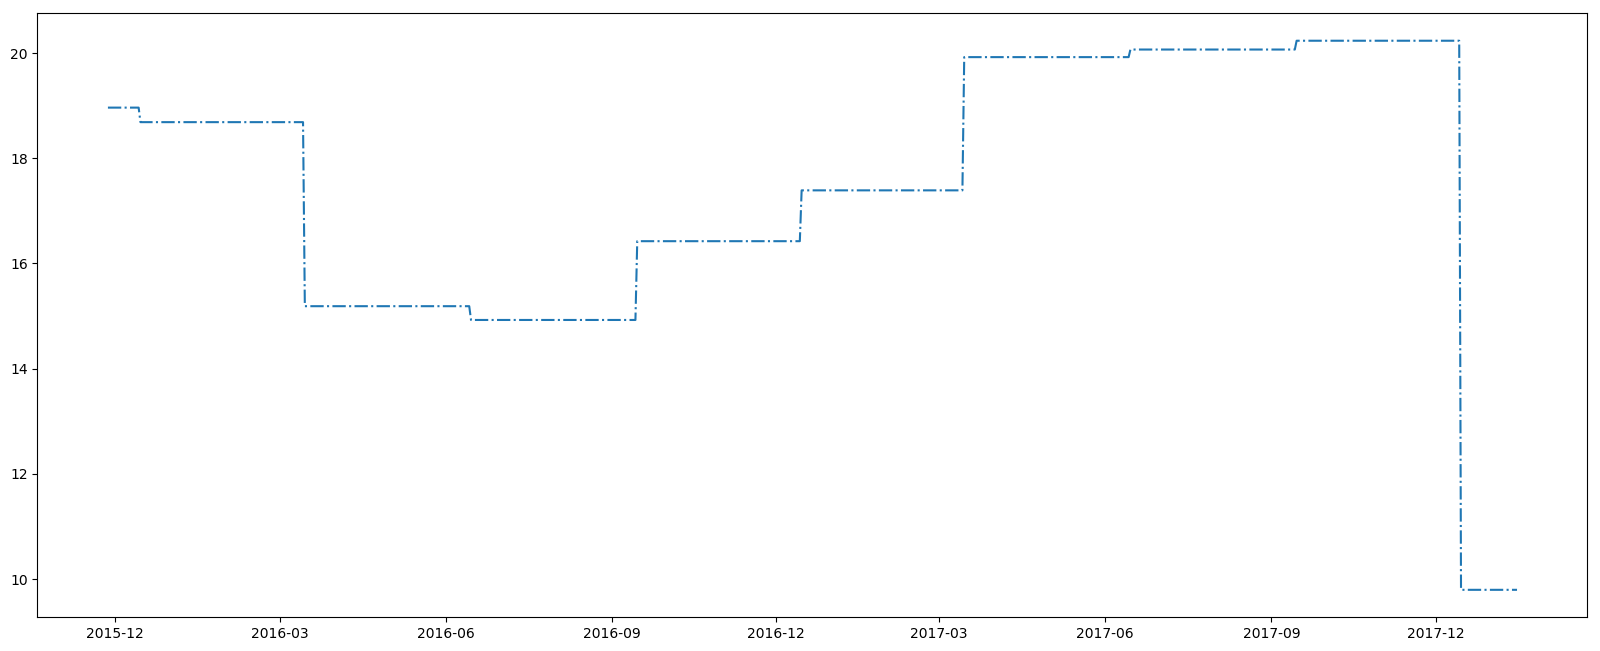

In [190]:
os.chdir("//Users//abhishekmukherjee//Desktop")
'''
fund = pd.read_excel("GS_FundamentalRatios_Cleaned.xlsx")
fund_test = fund.loc[fund['Date'].between('2015-11-27','2018-01-15', inclusive=True)]
plt.plot(fund_test["Date"], fund_test["EPS (recurring)"], '-.')
'''

In [191]:
print (stock)
#Simple Moving Average
def SMA(data, factor, days):
    
    data["SMA_"+ str(days) + "_" + factor] = talib.SMA(data[factor], timeperiod=days)
    return data

           Date    Open     High       Low   Close    Volume  Ex-Dividend  \
0    1999-05-04   76.00   77.250   70.0000   70.38  22320900          0.0   
1    1999-05-05   69.88   69.880   66.2500   69.13   7565700          0.0   
2    1999-05-06   68.00   69.380   67.0600   67.94   2905700          0.0   
3    1999-05-07   67.94   74.880   66.7500   74.13   4862300          0.0   
4    1999-05-10   73.38   73.500   70.2500   70.69   2589400          0.0   
5    1999-05-11   70.00   71.190   69.5000   70.63   1839800          0.0   
6    1999-05-12   71.00   74.880   69.1300   73.50   2659300          0.0   
7    1999-05-13   73.25   75.250   72.5000   74.25   1142900          0.0   
8    1999-05-14   71.25   72.250   69.0600   70.19   2058400          0.0   
9    1999-05-17   69.13   70.250   68.0000   68.63   2075000          0.0   
10   1999-05-18   68.25   70.440   68.1300   68.63   1407100          0.0   
11   1999-05-19   69.38   69.810   68.7500   69.31    727400          0.0   

In [192]:
#Exponential Moving Average
def EMA(data, factor, days):
    
    data["EMA_"+ str(days) + "_" + factor] = talib.EMA(data[factor], timeperiod=days)
    return data

In [193]:
#Double Exponential Moving Average
def DEMA(data, factor, days):
    
    data["DEMA_"+ str(days) + "_" + factor] = talib.DEMA(data[factor], timeperiod=days)
    return data

In [194]:
#Hilbert_Transform
def HT(data, factor):
    
    data["HT_" + factor] = talib.HT_TRENDLINE(data[factor])
    return data

In [195]:
#Kaufman Adaptive Moving Average
def KAMA(data, factor, days):
    
    data["KAMA_"+ str(days) + "_" + factor] = talib.KAMA(data[factor], timeperiod=days)
    return data

In [196]:
#MESA Adaptive Moving Average
def MAMA(data, factor):
    
    mama, fama = talib.MAMA(data[factor], fastlimit=0.8, slowlimit=0.2)
    data["MAMA_" + factor] = mama
    data["FAMA_" + factor] = fama
    return data



In [197]:
#Triple Exponential Moving Average 
def TEMA(data, factor, days):
    
    data["TEMA_"+ str(days) + "_" + factor] = talib.TEMA(data[factor], timeperiod=days)
    return data

In [198]:
#Triangular Moving Average
def TRIMA(data, factor, days):
    
    data["TRIMA_"+ str(days) + "_" + factor] = talib.TRIMA(data[factor], timeperiod=days)
    return data

In [199]:
#Weighted Moving Average
def WMA(data, factor, days):
    
    data["WMA_"+ str(days) + "_" + factor] = talib.WMA(data[factor], timeperiod=days)
    return data


In [200]:
def technical_indicators(data):
    
    #Compute Daily Return
    data['Daily_Return'] = (data['Close'] - data['Open'])/data['Open']
    
    time_periods = [7, 14, 26, 52, 128, 252]
    factors = ['Close', 'Daily_Return', 'Volume']
    
    #Compute various types of Time and factor varying Moving Averages
    for days in time_periods:
        for factor in factors: 
            data = SMA(data, factor, days)
            data = EMA(data, factor, days)
            data = DEMA(data, factor, days)
            data = KAMA(data, factor, days)
            data = TEMA(data, factor, days)
            data = TRIMA(data, factor, days)
            data = WMA(data, factor, days)
    
    #Compute the Hilbert Transform and Mesa Adaptive Moving Average
    for factor in factors: 
        data = HT(data, factor)
        #data = MAMA(data, factor)
    
    close, open_, high, low, volume = data['Close'], data['Open'], data['High'], data['Low'], data['Volume']
    
    #Compute Parabolic SAR
    data['SAR'] = talib.SAR(high, low, acceleration=0.7, maximum=0.2)
    
    #Compute various Momentum based Indicators
    
    data['ADX_14'] = talib.ADX(high, low, close, timeperiod= 14)
    data['ADXR_14'] = talib.ADXR(high, low, close, timeperiod= 14)
    data['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
    data['aroondown_14'], data['aroonup_14'] = talib.AROON(high, low, timeperiod=14)
    data['AROONOSC_14'] = talib.AROONOSC(high, low, timeperiod=14)
    data['BOP_14'] = talib.BOP(open_, high, low, close)
    data['CCI_14'] = talib.CCI(high, low, close, timeperiod=14)
    data['CMO_14'] = talib.CMO(close, timeperiod=14)
    data['DX_14'] = talib.DX(high, low, close, timeperiod=14)
    data['macd'], data['macdsignal'], data['macdhist'] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    data['MFI_14'] = talib.MFI(high, low, close, volume, timeperiod=14)    
    data['MINUS_DM_14'] = talib.MINUS_DM(high, low, timeperiod=14)
    data['MOM_10'] = talib.MOM(close, timeperiod=10)
    data['PLUS_DI_14'] = talib.PLUS_DI(high, low, close, timeperiod=14)
    data['PLUS_DM_14'] = talib.PLUS_DM(high, low, timeperiod=14)
    data['PPO'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
    data['ROC_10'] = talib.ROC(close, timeperiod=10)
    data['ROCP_10'] = talib.ROCP(close, timeperiod=10)
    data['ROCR'] = talib.ROCR(close, timeperiod=10)
    data['ROCR'] = talib.ROCR100(close, timeperiod=10)
    data['RSI_14'] = talib.RSI(close, timeperiod=14)
    data['RSI_26'] = talib.RSI(close, timeperiod=26)
    data['STOCH_slowk'], data['STOCH_slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    data['STOCH_fastk'], data['STOCH_fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
    data['STOCHRSI_fastk'], data['STOCHRSI_fastd'] = talib.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    data['TRIX_30'] = talib.TRIX(close, timeperiod=30)
    data['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    data['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)
    
    
    #Volality Indicator Functions
    data['ATR_14'] = talib.ATR(high, low, close, timeperiod=14)
    data['NATR_14'] = talib.NATR(high, low, close, timeperiod=14)
    data['TRANGE'] = talib.TRANGE(high, low, close)
    
    #Volume Indicator Functions
    data['AD'] = talib.AD(high, low, close, volume)
    data['ADOSC'] = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
    data['OBV'] = talib.OBV(close, volume)
    
    #Moving Average Convergence Divergence
    data['ema26_close'] = data['Close'].ewm(span = 26).mean()
    data['ema12_close'] = data['Close'].ewm(span = 12).mean()
    data['MACD'] = (data['ema12_close']-data['ema26_close'])

    #Bollinger Bands
    data['sd_Close_14'] = data['Close'].rolling(14).std()
    data['upper_band_14'] = data['SMA_14_Close'] + (data['sd_Close_14']*2)
    data['lower_band_14'] = data['SMA_14_Close'] - (data['sd_Close_14']*2)
    
    #Exponential Moving Average
    data['ema_close'] = data['Close'].ewm(com=0.4).mean()
    
    # Create Momentum
    data['momentum'] = data['Close']-1
    data['log_momentum'] = np.log(data['momentum'])
    return data

In [271]:
os.chdir("//Users//abhishekmukherjee//Desktop")
stock = pd.read_excel("GS_Daily_Factset.xlsx", parse_dates = True)

stock = stock[::-1]
stock = technical_indicators(stock)
stock = stock[::-1]
print (stock['SMA_7_Close'])
stock.to_excel("GS_Daily_Updated_nofill_correct.xlsx")

/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


0       220.332857
1       220.288571
2       220.367143
3       219.935714
4       219.128571
5       218.114286
6       217.307143
7       217.211429
8       216.581429
9       215.321429
10      214.454286
11      213.914286
12      212.977143
13      211.388571
14      209.775714
15      208.802857
16      208.147143
17      207.361429
18      206.658571
19      205.318571
20      203.937143
21      202.638571
22      201.635714
23      200.827143
24      199.601429
25      198.682857
26      199.085714
27      200.568571
28      202.225714
29      203.342857
           ...    
5139     63.687500
5140     64.062500
5141     64.401786
5142     64.401786
5143     64.517857
5144     64.866071
5145     65.437500
5146     65.455357
5147     65.330357
5148     65.571429
5149     66.178571
5150     66.776786
5151     66.973214
5152     67.098214
5153     67.464286
5154     68.276786
5155     69.401786
5156     70.258929
5157     70.580357
5158     70.776786
5159     71.562500
5160     71.

In [273]:
stock = stock.fillna(method = 'ffill')
#stock.to_excel("GS_Daily_Updated.xlsx")

In [274]:
def plot_technical_indicators(dataset, last_days):
    plt.rc('figure', figsize=(15, 8), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    #Moving Average Indicator Plots
    plt.title("Moving Average indicators of " + stock_name + " for last " + str(last_days) + " days")
    plt.plot(dataset['SMA_7_Close'],label='SMA_7', linestyle='--')
    plt.plot(dataset['SMA_14_Close'],label='SMA_14', linestyle='--')
    #plt.plot(dataset['EMA_7_Close'],label='EMA_7', linestyle='--')
    #plt.plot(dataset['EMA_14_Close'],label='EMA_14', linestyle='--')
    plt.plot(dataset['upper_band_14'],label='Upper Band', color = 'c')
    plt.plot(dataset['lower_band_14'],label='Lower Band', color = 'c')
    plt.fill_between(x_, dataset['lower_band_14'], dataset['upper_band_14'], alpha=0.05)
    plt.plot(dataset['Close'],label='Close Price')
    plt.ylabel('USD')
    plt.legend()
    plt.show()
              
    #Momentum Indicator Plots
    plt.title("Momentum indicators of " + stock_name +" for last " + str(last_days) + " days")
    plt.plot(dataset['ADX_14'],label='ADX_14',linestyle='--')
    plt.plot(dataset['RSI_14'],label='RSI_14', linestyle='--')
    plt.plot(dataset['MFI_14'],label='MFI_14', linestyle='--')
    plt.plot(dataset['macdsignal'],label='macdsignal', linestyle='--')
    plt.plot(dataset['ULTOSC'],label='ULTOSC', linestyle='--')
    plt.plot(dataset['WILLR'],label='WILLR', linestyle='--')
    plt.legend()
    plt.show()
    
    #Volatility Indicator Plots
    plt.title("Volatility indicators of " + stock_name +" for last " + str(last_days) + " days")
    plt.plot(dataset['ATR_14'],label='ATR_14',linestyle='--')
    plt.plot(dataset['NATR_14'],label='NATR_14', linestyle='--')
    plt.plot(dataset['TRANGE'],label='TRANGE', linestyle='--')
    plt.legend()
    plt.show()
    
    #Volume Indicator Plots
    plt.title("Volume indicators of " + stock_name +" for last " + str(last_days) + " days")
    plt.plot(dataset['AD'],label='AD',linestyle='--')
    plt.plot(dataset['ADOSC'],label='ADOSC', linestyle='--')
    plt.plot(dataset['OBV'],label='OBV', linestyle='--')
    plt.legend()
    plt.show()
    
    #MACD Plot
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='r', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='r', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')
    plt.legend()
    plt.show()



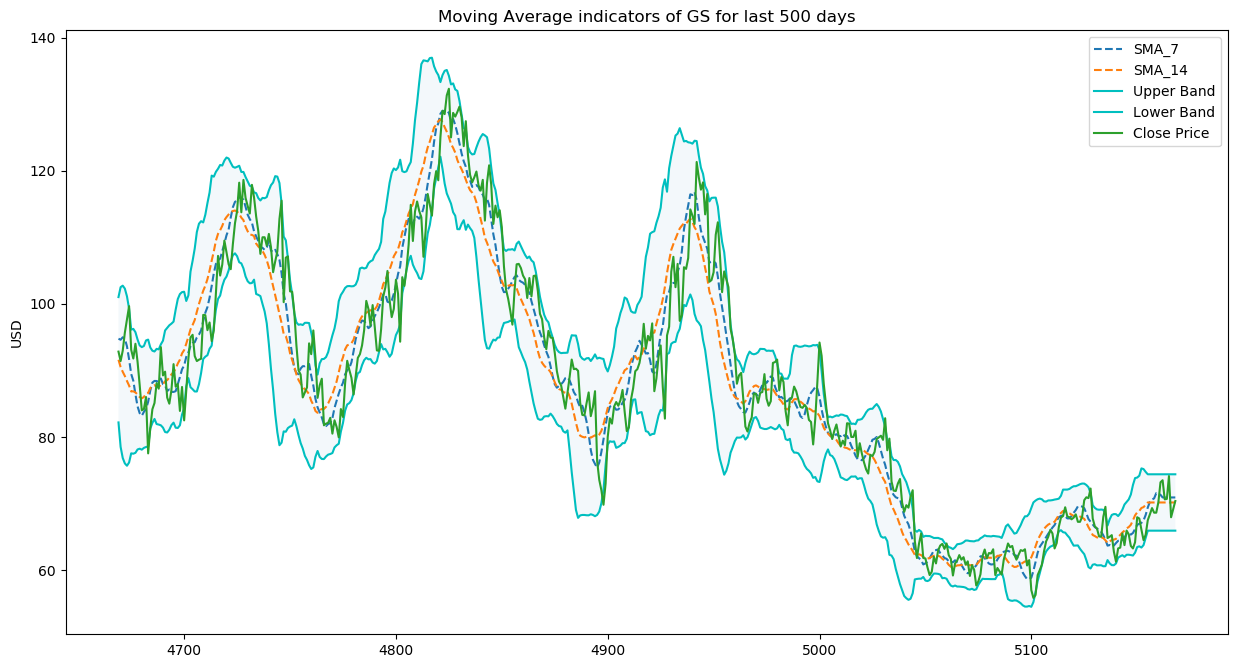

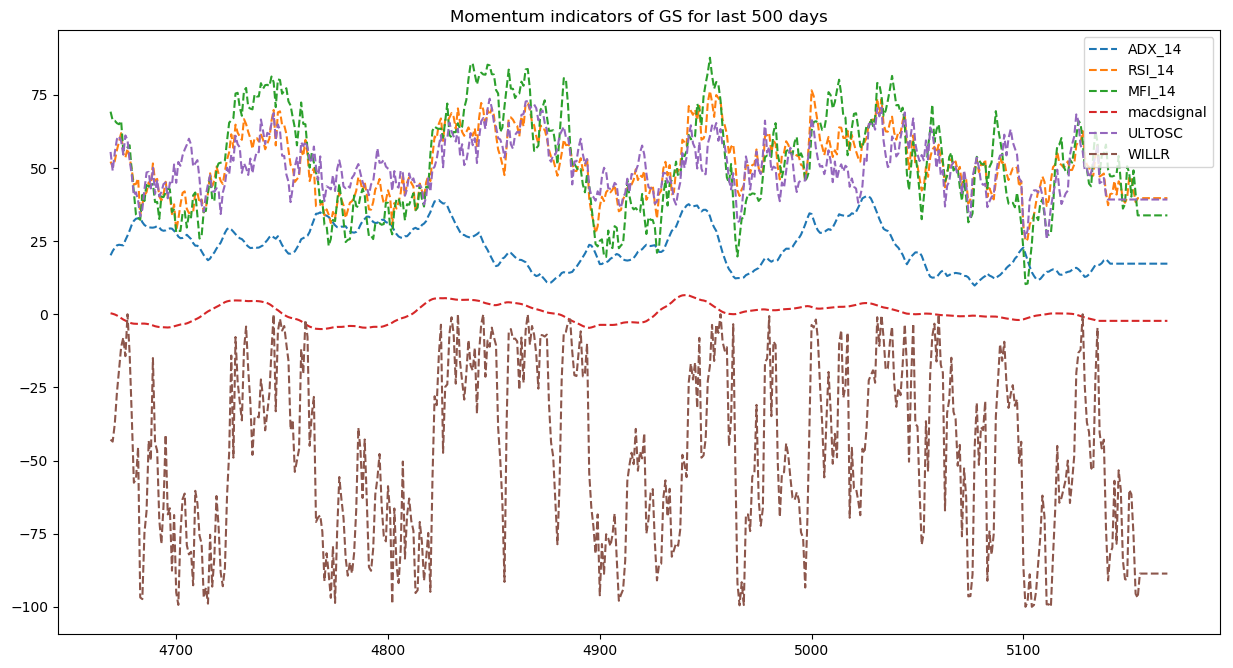

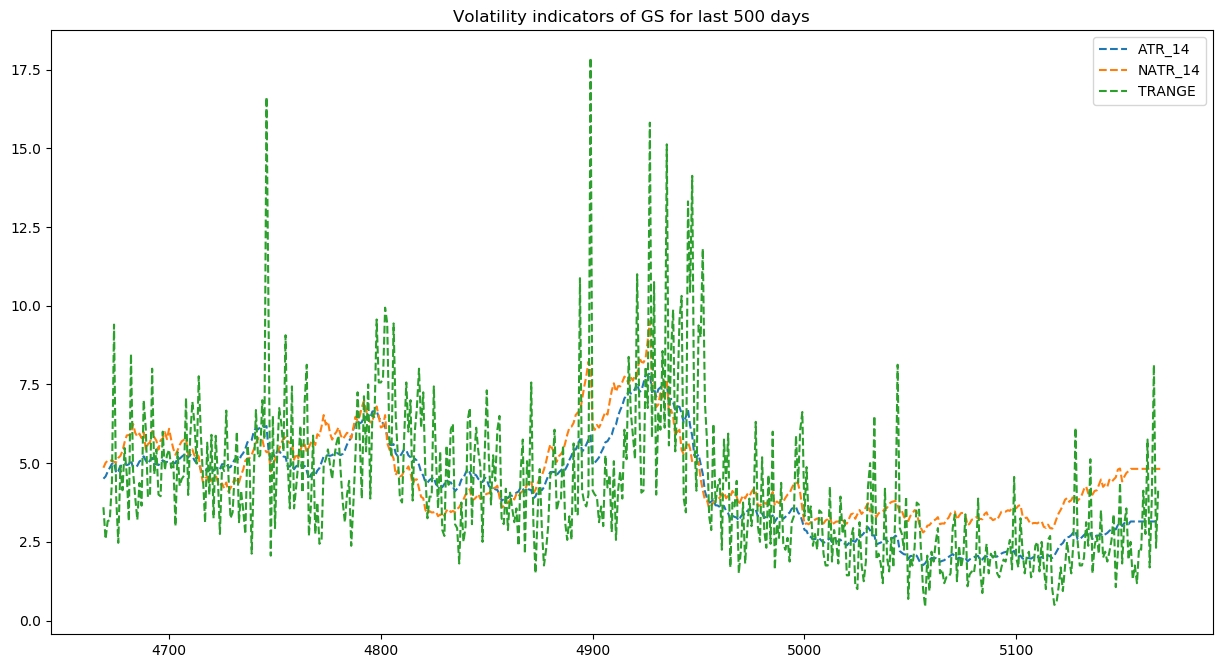

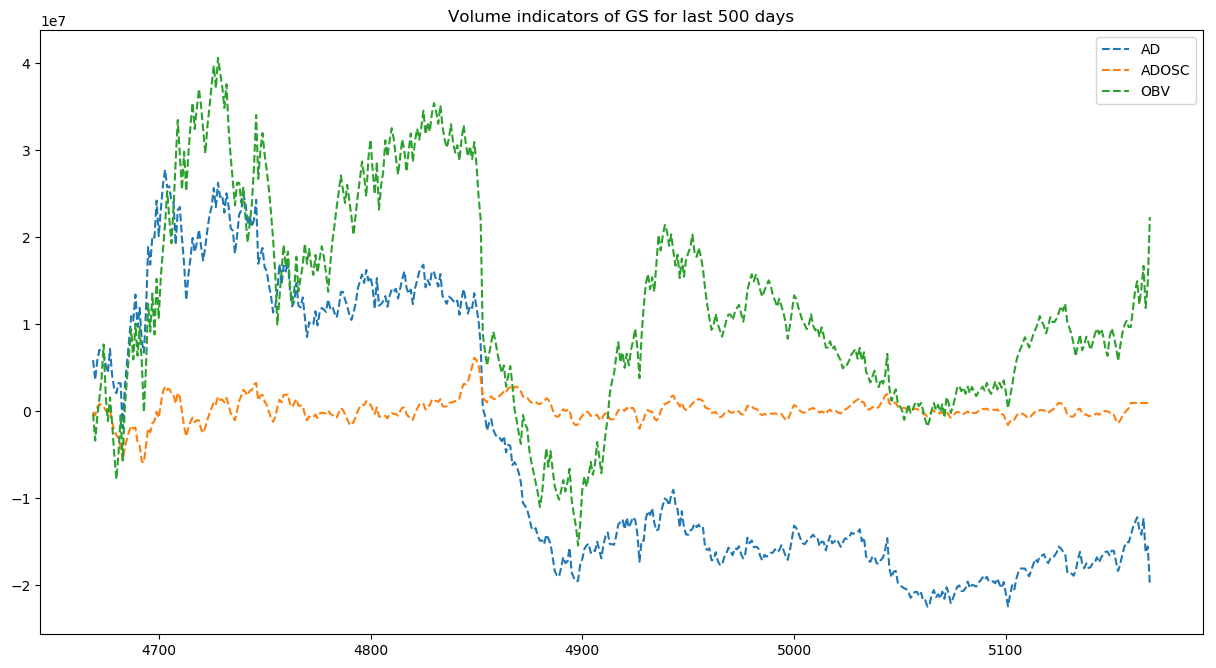

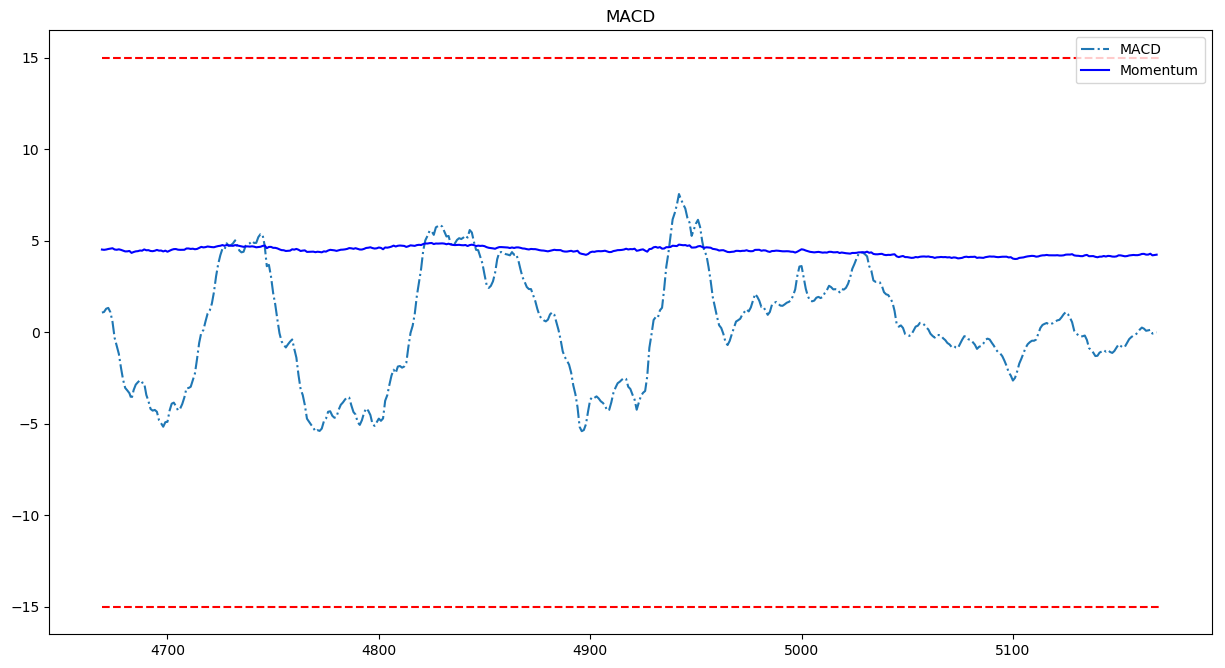

In [275]:
plot_technical_indicators(stock, 500)

In [279]:
#print (stock.columns)
#print (stock_fundamental.columns)
#os.chdir("//Users//abhishekmukherjee//Desktop//")
#stock.to_excel("GS_CompleteTechnical.xlsx")

#stock_combined = pd.merge(stock, stock_fundamental, how='inner', left_index=True, right_index=True)
#print (stock_combined)
#d = pd.concat([stock_combined, stock], join='inner', axis=1)
#print (stock)

stock_technical = pd.read_excel("GS_Daily_Updated.xlsx", index = 'Date')
stock_technical = stock_technical.set_index(['Date'])
#print (stock_technical.columns)
stock_combined = pd.merge(stock_technical, stock_fundamental, how='inner', on='Date')
#print (stock_combined['EPS (Dilited)'])


In [280]:
os.chdir("//Users//abhishekmukherjee//Desktop//")
#stock_combined.to_excel("GS_CompleteData_update1.xlsx")

In [291]:
os.chdir("//Users//abhishekmukherjee//Desktop//")
df1 = pd.read_excel("GS_CompleteData_update1.xlsx")
#print (df1['Date'])

In [303]:
os.chdir("//Users//abhishekmukherjee//Desktop//")
df1 = pd.read_excel("GS_CompleteData_update1.xlsx")
df2 = pd.read_excel("GS_Analyst_Clean.xlsx")
df1 = df1.set_index(['Date'])
df2 = df2.set_index(['Date'])
df = pd.merge(df1, df2, how='inner', on='Date')
print (df.columns)

Index(['Close', 'Volume', 'Change', '% Change', '% Return',
       'Total Return (Gross)', 'Cumulative Return %', 'Open', 'High', 'Low',
       ...
       'Invested Assets/Deposits (%)', 'Loans/Deposits (%)',
       'Invested Assets+Loans/Deposits (%)',
       'Loan Losses Provision/Total Loans', 'Loan Losses Reserves/Total Loans',
       'Tier 1 Risk Based Capital Ratio (%)',
       'Total Capital Adequacy Ratio (%)', 'Risk Weighted Assets',
       'EPS_Analyst', 'Growth (YoY%)_Analyst'],
      dtype='object', length=223)


In [307]:
df.to_excel("GS_FinalData_Final.xlsx")

In [8]:
os.chdir("//Users//abhishekmukherjee//Desktop")
data = pd.read_excel("GS_FinalDataset.xlsx")
(data['Date'])

0      2019-09-13
1      2019-09-12
2      2019-09-11
3      2019-09-10
4      2019-09-09
5      2019-09-06
6      2019-09-05
7      2019-09-04
8      2019-09-03
9      2019-08-30
10     2019-08-29
11     2019-08-28
12     2019-08-27
13     2019-08-26
14     2019-08-23
15     2019-08-22
16     2019-08-21
17     2019-08-20
18     2019-08-19
19     2019-08-16
20     2019-08-15
21     2019-08-14
22     2019-08-13
23     2019-08-12
24     2019-08-09
25     2019-08-08
26     2019-08-07
27     2019-08-06
28     2019-08-05
29     2019-08-02
          ...    
4959   1999-12-28
4960   1999-12-27
4961   1999-12-23
4962   1999-12-22
4963   1999-12-21
4964   1999-12-20
4965   1999-12-17
4966   1999-12-16
4967   1999-12-15
4968   1999-12-14
4969   1999-12-13
4970   1999-12-10
4971   1999-12-09
4972   1999-12-08
4973   1999-12-07
4974   1999-12-06
4975   1999-12-03
4976   1999-12-02
4977   1999-12-01
4978   1999-11-30
4979   1999-11-29
4980   1999-11-26
4981   1999-11-24
4982   1999-11-23
4983   199

In [9]:
data.head()

,Date,Close,Volume,Change,% Change,% Return,Total Return (Gross),Cumulative Return %,Open,High,...,Std_7_Daily_Return,Std_14_Daily_Return,Std_21_Daily_Return,Close_FFT_4,Close_FFT_7,Close_FFT_10,Close_FFT_14,Close_FFT_21,Close_FFT_50,Close_FFT_100
0,2019-09-13,219.90,2722411.0,1.16,0.530310,0.530318,273.50992,288.646423,220.35,221.50,...,0.009059,0.009059,0.010298,(159.7814501287924+4.631230707382764j),(142.6446134311504+4.601832763931439j),(144.49670588491102+2.7159546328927044j),(141.03056712120355+1.3795126676905265j),(145.18238485210287+0.029699757334955758j),(144.9217251140677-0.24387799670649704j),(141.97082810006293-0.024057117788937623j)
1,2019-09-12,218.74,2913786.0,1.94,0.894834,0.894824,272.06710,286.596234,216.38,220.76,...,0.011566,0.011566,0.011421,(159.99062961781573+4.643168769176142j),(142.96795964028638+4.631388730533502j),(144.87458915708808+2.6786960101337733j),(141.5159245309332+1.315961770543j),(146.08958210501385+0.020542764684237564j),(147.79310957194858-0.2829990565511186j),(146.83445472769122-0.05156515968901808j)
2,2019-09-11,216.80,1886291.0,1.17,0.542596,0.542608,269.65417,283.167560,215.21,216.85,...,0.011337,0.011337,0.011519,(160.19972462769283+4.654988998151912j),(143.29215014573052+4.66058475123588j),(145.252836951684+2.641012522899615j),(142.00224357384093+1.252001781550555j),(146.99654046254076+0.011371403749781388j),(150.65693188184872-0.32099831955515146j),(151.69902893893362-0.07825640298214252j)
3,2019-09-10,215.63,2616235.0,3.65,1.721861,1.721860,268.19890,281.099680,213.50,217.09,...,0.011671,0.011671,0.011587,(160.4087334364385+4.66669109434013j),(143.61717886997917+4.689418556959426j),(145.63143590121612+2.6029101481189865j),(142.48948785794207+1.1876525838970653j),(147.90303422501174+0.0021920892823882724j),(153.50817292146667-0.35772515817330625j),(156.5405424298345-0.10370805502170606j)
4,2019-09-09,211.98,2734609.0,4.77,2.302012,2.302001,263.65906,274.648753,209.22,213.88,...,0.011376,0.011376,0.011453,(160.6176543222106+4.6782747607687964j),(143.9430396808727+4.717887906775664j),(146.01037267119574+2.5643949291597243j),(142.97762095531763+1.122934181759435j),(148.80883794262058-0.006988758404148542j),(156.34186113715438-0.39303398869922795j),(161.33525740132316-0.12751695844226105j)


In [313]:
'''
data = data[::-1]
data['Std_7_Daily_Return'] = data['Daily_Return'].rolling(14).std()
data['Std_14_Daily_Return'] = data['Daily_Return'].rolling(14).std()
data['Std_21_Daily_Return'] = data['Daily_Return'].rolling(21).std()
data = data[::-1]
data['Std_21_Daily_Return'].head()
'''

0    0.010298
1    0.011421
2    0.011519
3    0.011587
4    0.011453
Name: Std_21_Daily_Return, dtype: float64

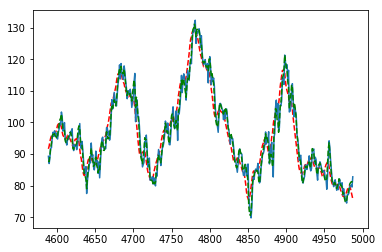

In [10]:
data['SMA_7_Close'][-400:-1].plot(label='SMA_14', linestyle='--', color = 'r')
data['Close'][-400:-1].plot()
data['TEMA_7_Close'][-400:-1].plot(label='EMA_7', linestyle='--', color = 'g')

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


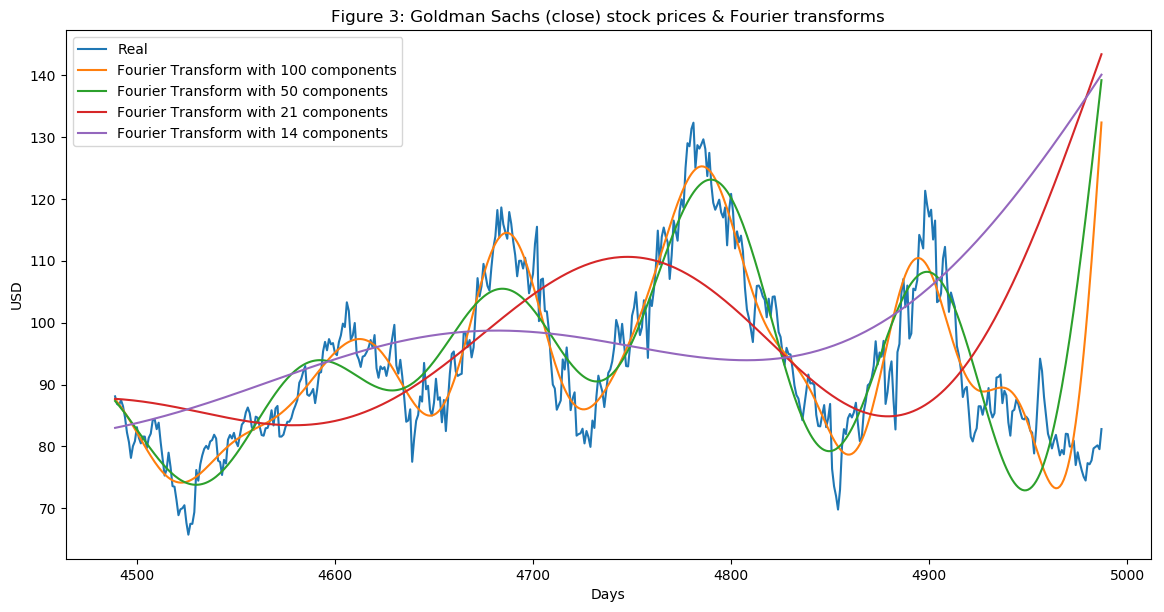

In [56]:
data_FT = data[['Date', 'Close']]
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [4, 7, 10, 14, 21, 50, 40, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    #plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
    data['Close_FFT_' + str(num_)] = np.fft.ifft(fft_list_m10)

#print (data_FT)
'''
plt.plot(data_FT['Close'],  label='Real')
plt.plot(data['Close_FFT_100'],  label='Fourier Transform with 100 components')
plt.plot(data['Close_FFT_50'],  label='Fourier Transform with 50 components')
plt.plot(data['Close_FFT_21'],  label='Fourier Transform with 21 components')
plt.plot(data['Close_FFT_14'],  label='Fourier Transform with 14 components')
'''

plt.plot(data_FT['Close'][-500:-1],  label='Real')
plt.plot(data['Close_FFT_100'][-500:-1],  label='Fourier Transform with 100 components')
plt.plot(data['Close_FFT_50'][-500:-1],  label='Fourier Transform with 50 components')
plt.plot(data['Close_FFT_21'][-500:-1],  label='Fourier Transform with 21 components')
plt.plot(data['Close_FFT_14'][-500:-1],  label='Fourier Transform with 14 components')

plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Goldman Sachs (close) stock prices & Fourier transforms')
plt.legend()
plt.show()


In [362]:
#Reverse a dataframe in place
'''
print (data['Close'][0])
data = data.reindex(index=data.index[::-1])
data.reset_index(inplace=True, drop=True)
data
'''

"\nprint (data['Close'][0])\ndata = data.reindex(index=data.index[::-1])\ndata.reset_index(inplace=True, drop=True)\ndata\n"

In [553]:
os.chdir("//Users//abhishekmukherjee//Desktop")
data = pd.read_excel("GS_FinalData_Update1.xlsx")
print('Total dataset has {} days, and {} features.'.format(data.shape[0], \
                                                              data.shape[1]))

Total dataset has 4989 days, and 343 features.


In [594]:

df = data.copy()
del df['Date']
del df['Earning_Surprise_0.05']
del df['Earning_Surprise_0.1']
del df['Earning_Surprise_0.15']

In [595]:
#Feature Engineering
#Removing 100 features to test model's accuracy. Test Result = Model's accuracy reduces by 12% by reducing features.
#Learnings: No of features and quality of features has a direct impact on the Model's performance

'''
i = 0
print ("Removed Features: ")
for item in df.columns:
    i = i +1
    if i > 13 and i < 79:
        print (i, item)
        del df[item]
    if i >= 212 and i <= 220:
        print (i, item)
        del df[item]
    if i >= 233 and i <= 295:
        print (i, item)
        del df[item]
'''
df.columns.values[0:-1]

array(['Close', 'Volume', 'Change', '% Change', '% Return',
       'Total Return (Gross)', 'Cumulative Return %', 'Open', 'High',
       'Low', 'Cumulative Change %', 'VWAP', 'Daily_Return',
       'SMA_7_Close', 'EMA_7_Close', 'DEMA_7_Close', 'KAMA_7_Close',
       'TEMA_7_Close', 'TRIMA_7_Close', 'WMA_7_Close',
       'SMA_7_Daily_Return', 'EMA_7_Daily_Return', 'DEMA_7_Daily_Return',
       'KAMA_7_Daily_Return', 'TEMA_7_Daily_Return',
       'TRIMA_7_Daily_Return', 'WMA_7_Daily_Return', 'SMA_7_Volume',
       'EMA_7_Volume', 'DEMA_7_Volume', 'KAMA_7_Volume', 'TEMA_7_Volume',
       'TRIMA_7_Volume', 'WMA_7_Volume', 'SMA_14_Close', 'EMA_14_Close',
       'DEMA_14_Close', 'KAMA_14_Close', 'TEMA_14_Close',
       'TRIMA_14_Close', 'WMA_14_Close', 'SMA_14_Daily_Return',
       'EMA_14_Daily_Return', 'DEMA_14_Daily_Return',
       'KAMA_14_Daily_Return', 'TEMA_14_Daily_Return',
       'TRIMA_14_Daily_Return', 'WMA_14_Daily_Return', 'SMA_14_Volume',
       'EMA_14_Volume', 'DEMA_14_Volume

In [685]:
class Plot:
    
    def __init__(self, data):
        self.data = data
        
    def autocorr(self, col):
        
        plot_acf(data[col], title = col + ' Autocorrelation Plot')
        plt.show()
            
    def featureImportance(self, feature_importance, flag):
    
        f = dict()
        n = len(feature_importance)
        for i in range (n):
            f[X_test.columns[i]] = feature_importance[i]
        f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
        f = f[:30]
        feature_name = list()
        feature_values = list()
        for i, j in f:
            feature_name.append(i)
            feature_values.append(j)
        fig = plt.figure(figsize=(14,5))
        plt.xticks(rotation='vertical')
        plt.bar([i for i in range(len(f))], feature_values, tick_label=feature_name)
        if flag == 1:
            plt.title('Feature importance for EPS Prediction (Excluding Analyst estimate features)')
        else:
            plt.title('Feature importance for EPS Prediction (Including Analyst estimate features)')
        plt.show()
    
    def lossCurve(self, training_rounds, eval_result):
        
        plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
        plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title('Training Vs Validation Error')
        plt.legend()
        plt.show()

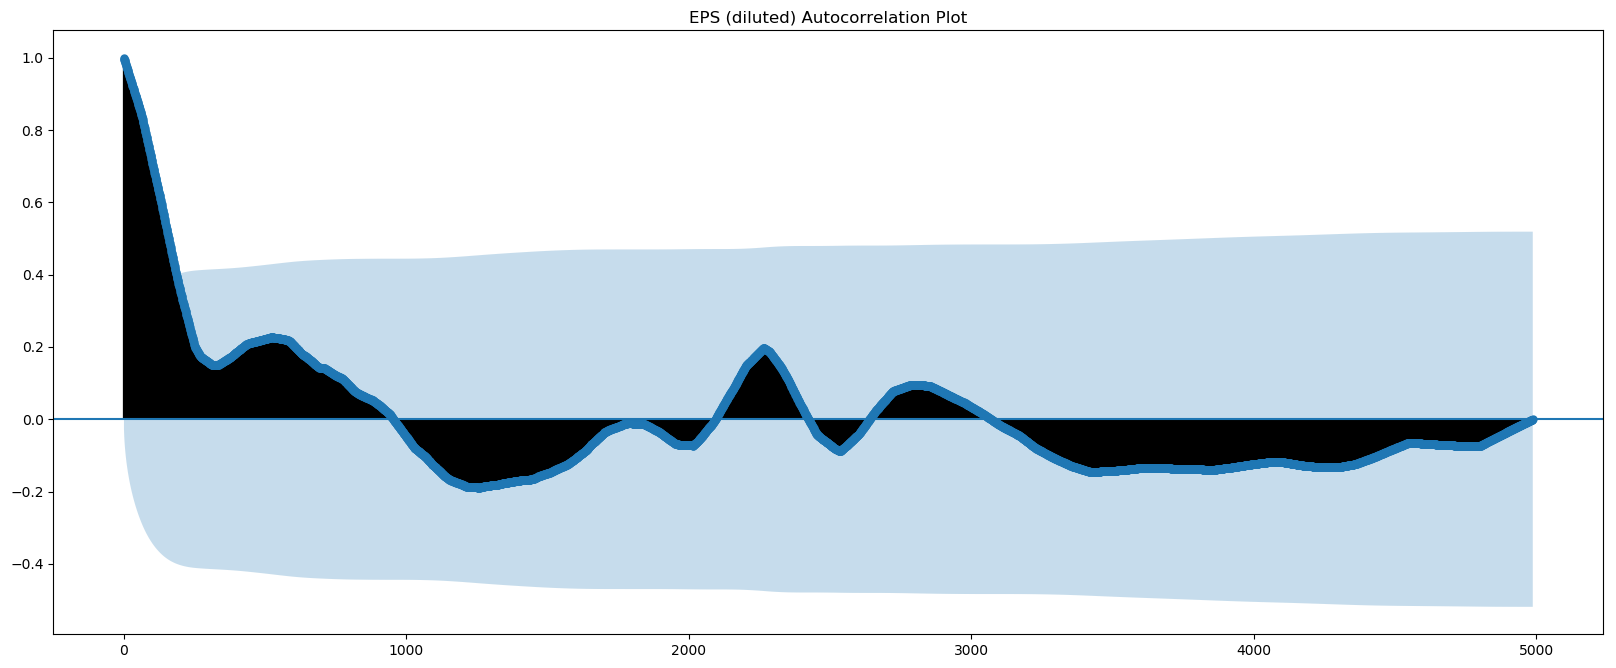

In [686]:
plot = Plot(data)
plot.autocorr('EPS (diluted)')

## Using XGBoost Method for EPS prediction (Regression Problem) and Feature Importance

In [655]:
def getData(data_temp):
    
    data = data_temp.copy()
    Y = data['EPS (diluted)']
    #print (Y)
    del data['EPS (recurring)']
    del data['EPS (diluted)']
    #del data['Growth (YoY%)_Analyst']
    #del data['EPS_Analyst']
    #del data['EPS_Analyst']
    X = data
    
    train_samples = int(X.shape[0] * 0.15)
 
    X_test = X.iloc[:train_samples]
    X_train = X.iloc[train_samples:]

    Y_test = Y.iloc[:train_samples]
    Y_train = Y.iloc[train_samples:]
    
    return (X_train, Y_train), (X_test, Y_test)

In [656]:
#print (X_test)
(X_train, Y_train), (X_test, Y_test) = getData(df)
#regressor = xgb.XGBRegressor(gamma=0,n_estimators=300,base_score=0.5,colsample_bytree=0.3,learning_rate=0.1)

regressor = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.12,
                max_depth = 3, alpha = 5, n_estimators = 300)
xgbModel=regressor.fit(X_train, Y_train,eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose = False)
print(xgbModel)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[03:53:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', learning_rate=0.12, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


Root Mean Squared Error: 4.033482
Regression Prediction Score: 42.4%


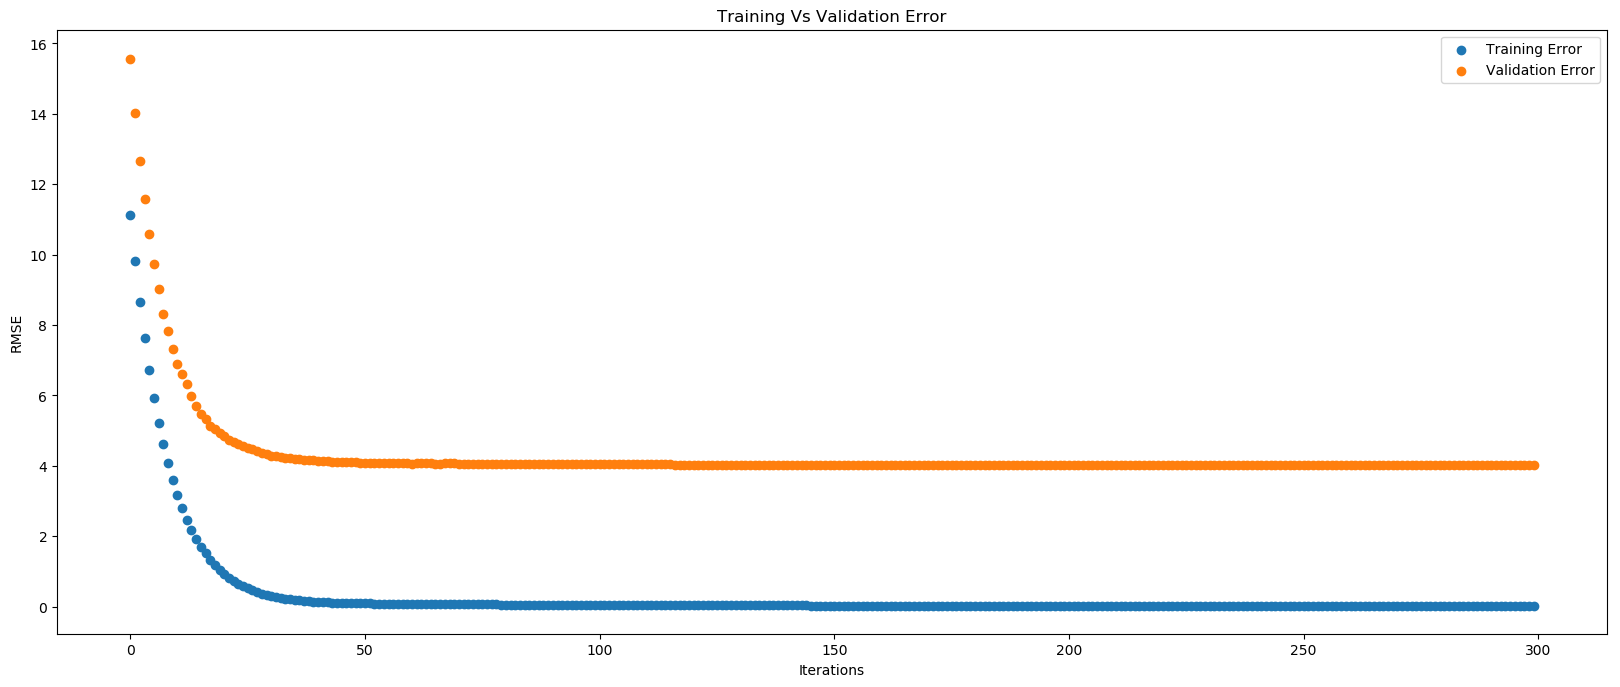

In [657]:
from sklearn.metrics import mean_squared_error

#print(accuracy_score(X_test,Y_test))
rmse = np.sqrt(mean_squared_error(Y_test, regressor.predict(X_test)))
print("Root Mean Squared Error: %f" % (rmse))
print ("Regression Prediction Score: " + str(round(regressor.score(X_test,Y_test) * 100, 2)) + "%")
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

plot.lossCurve(training_rounds, eval_result)


# Feature Reduction using XGBoost's feature importance

In [676]:
def featureReduction(feature_importance):
    
    f = dict()
    n = len(feature_importance)
    for i in range (n):
        f[X_test.columns[i]] = feature_importance[i]
    f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
    feature_name = list()
    feature_values = list()
    for i, j in f:
        feature_name.append(i)
        feature_values.append(j)
    
    return feature_name, feature_values
    

In [677]:
feature_importance = xgbModel.feature_importances_.tolist()
feature_sorted, _ = featureReduction(feature_importance)
df_temp = df.copy()

for f in feature_sorted[100:-1]:
    for col in df_temp.columns:
        if col == f:
            #print (col)
            del df_temp[col]
df_temp.shape[1]

339

In [678]:
(X_train, Y_train), (X_test, Y_test) = get_feature_importance_data(df_temp)
regressor = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.12,
                max_depth = 3, alpha = 5, n_estimators = 300)
xgbModel=regressor.fit(X_train, Y_train,eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose = False)
print(xgbModel)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[04:11:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', learning_rate=0.12, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


Root Mean Squared Error: 3.919521
Regression Prediction Score: 45.61%


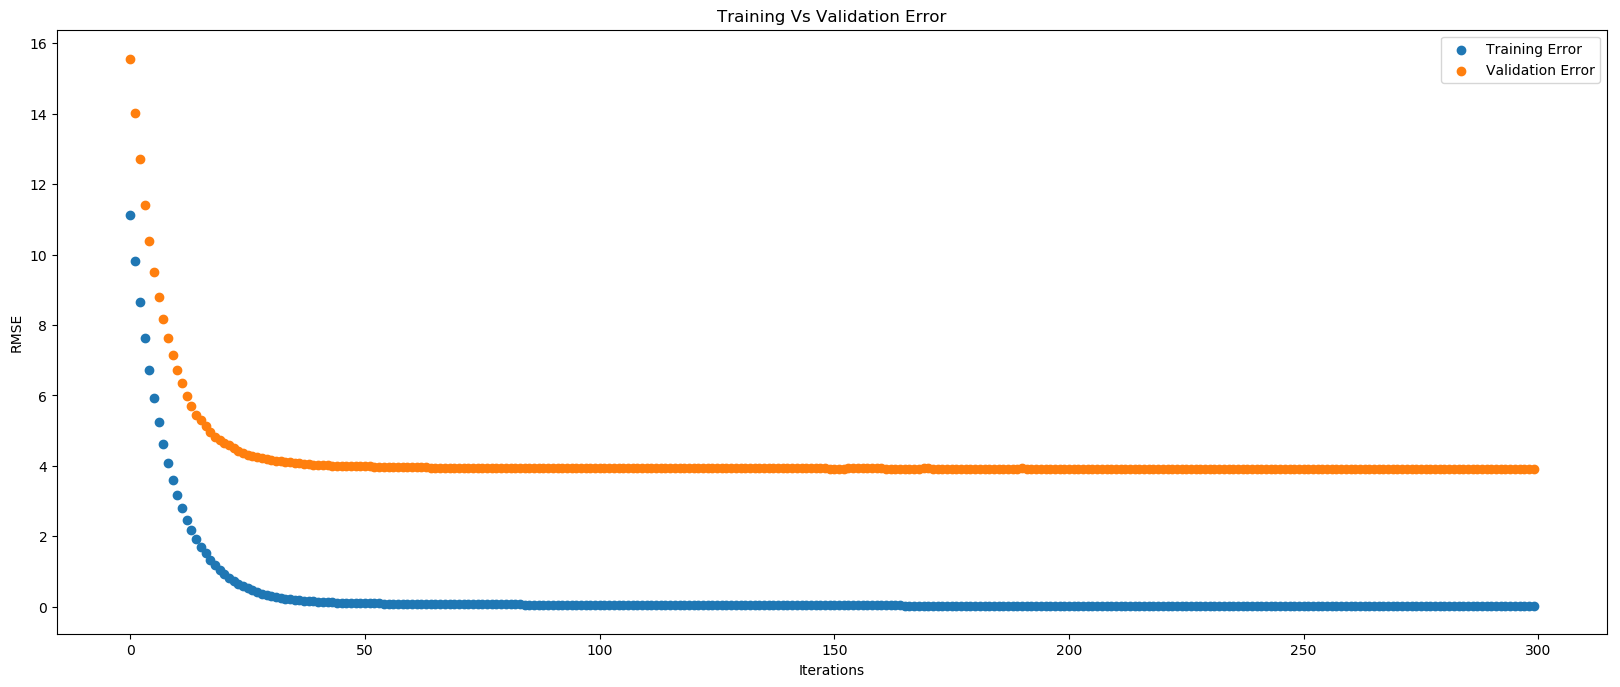

In [629]:
from sklearn.metrics import mean_squared_error

#print(accuracy_score(X_test,Y_test))
rmse = np.sqrt(mean_squared_error(Y_test, regressor.predict(X_test)))
print("Root Mean Squared Error: %f" % (rmse))
print ("Regression Prediction Score: " + str(round(regressor.score(X_test,Y_test) * 100, 2)) + "%")
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

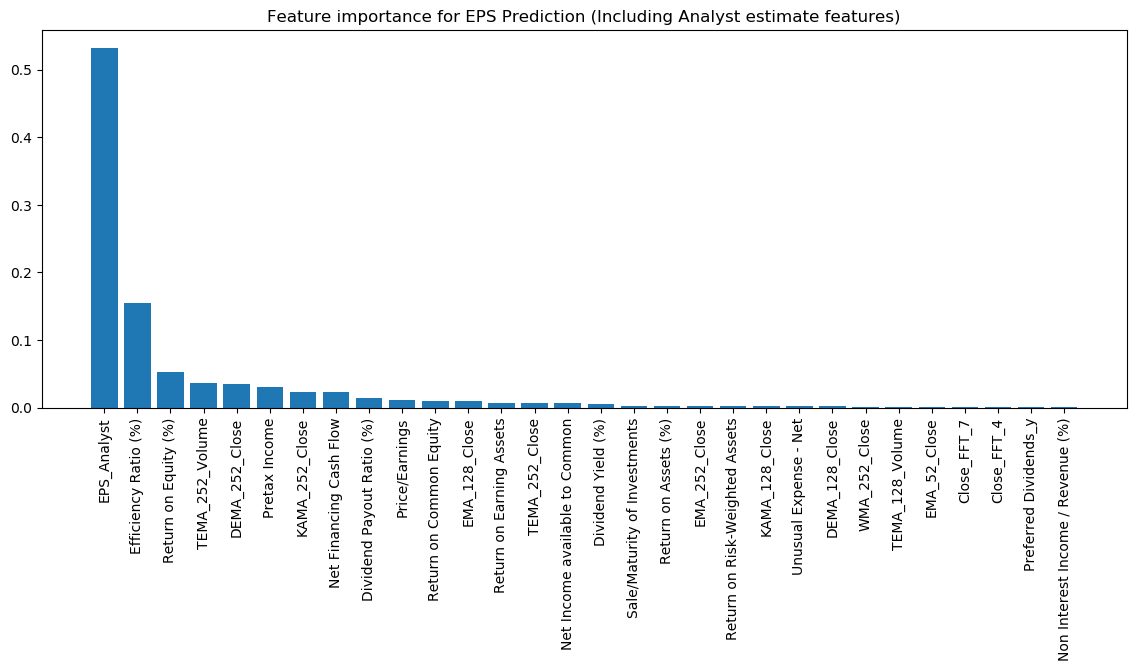

In [687]:
feature_importance = xgbModel.feature_importances_.tolist()

plot.featureImportance(feature_importance, 0)


# Using XGBoost for Earning Surprise Classification


In [5]:
os.chdir("//Users//abhishekmukherjee//Desktop")
data = pd.read_excel("GS_FinalData_Update.xlsx")
print('Total dataset has {} days, and {} features.'.format(data.shape[0], \
                                                              data.shape[1]))

Total dataset has 4989 days, and 340 features.


In [6]:
print (data.shape[0], data.shape[1])

4989 340


In [7]:
'''
for item in data['EPS (diluted)']:
    print (item)
'''

thresholds = [0.05, 0.1, 0.15] #Earning Surprise Thresholds
for h in thresholds:
    
    data['Earning_Surprise_' + str(h)] = -2
    
    for i in range(data.shape[0]):
        
        if (((data['EPS (diluted)'][i] - data['EPS_Analyst'][i])/data['EPS_Analyst'][i]) - 1) > h :
            data['Earning_Surprise_' + str(h)][i] = 2 #Postive Surprise

        elif (((data['EPS (diluted)'][i] - data['EPS_Analyst'][i])/data['EPS_Analyst'][i]) - 1) < -h :
            data['Earning_Surprise_' + str(h)][i] = 0 #Negative Surprise

        else:
            data['Earning_Surprise_' + str(h)][i] = 1 #Neutral
        
#data['Earning_Surprise_' + str(h[0])]
        
        

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
#Converting string of FFT to Complex and then to float
for i in range(data['Close_FFT_7'].shape[0]):
    data['Close_FFT_4'][i] = abs(complex(data['Close_FFT_4'][i]))
    data['Close_FFT_7'][i] = abs(complex(data['Close_FFT_7'][i]))
    data['Close_FFT_10'][i] = abs(complex(data['Close_FFT_10'][i]))
    data['Close_FFT_14'][i] = abs(complex(data['Close_FFT_14'][i]))
    data['Close_FFT_21'][i] = abs(complex(data['Close_FFT_21'][i]))
    data['Close_FFT_50'][i] = abs(complex(data['Close_FFT_50'][i]))
    data['Close_FFT_100'][i] = abs(complex(data['Close_FFT_100'][i]))
    #print (item)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCop

In [309]:
os.chdir("//Users//abhishekmukherjee//Desktop")
data = pd.read_excel("GS_FinalData_Update1.xlsx")

In [175]:
thresholds = [0.2, 0.25, 0.3]
for h in thresholds:
    
    data['Earning_Surprise_' + str(h)] = -2
    
    for i in range(data.shape[0]):
        
        if (((data['EPS (diluted)'][i] - data['EPS_Analyst'][i])/data['EPS_Analyst'][i]) - 1) > h :
            data['Earning_Surprise_' + str(h)][i] = 2 #Postive Surprise

        elif (((data['EPS (diluted)'][i] - data['EPS_Analyst'][i])/data['EPS_Analyst'][i]) - 1) < -h :
            data['Earning_Surprise_' + str(h)][i] = 0 #Negative Surprise

        else:
            data['Earning_Surprise_' + str(h)][i] = 1 #Neutral

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [312]:
#data['Close_FFT_100'].plot()
#del data['Date']
data = data[::-1]
del data['Date']


In [323]:
def get_data_classification(data_temp):
    
    data = data_temp.copy()
    Y = data['Earning_Surprise_0.15']
    #print (Y)
    del data['Earning_Surprise_0.05']
    del data['Earning_Surprise_0.1']
    del data['Earning_Surprise_0.15']
    '''
    del data['Earning_Surprise_0.2']
    del data['Earning_Surprise_0.25']
    del data['Earning_Surprise_0.3']
    '''
    del data['EPS (diluted)']
    del data['EPS_Analyst']
    del data['EPS (recurring)']
    del data['Growth (YoY%)_Analyst']
    #del data['EPS_Analyst']
    X = data
    train_samples = int(X.shape[0] * 0.5)
    train_samples_start = int(X.shape[0] * 0.2)
    train_samples_end = int(X.shape[0] * 0.4)
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    Y_train = Y.iloc[:train_samples]
    Y_test = Y.iloc[train_samples:]
    
    return X_train, Y_train, X_test, Y_test

In [324]:
X_train, Y_train, X_test, Y_test = get_data_classification(data)

Y_train.shape

(2494,)

In [325]:

model = xgb.XGBClassifier()
model.fit(X_train, Y_train, verbose = True)
print(model)
# make predictions for test data
Y_pred = model.predict(X_test)
print (Y_pred)
predictions = [round(value) for value in Y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

'''
classifier = xgb.XGBClassifier(colsample_bytree = 0.4, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 200, objective = 'multi:softmax', num_class = 3) #optimized


#regressor = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.008,
#                max_depth = 4, alpha = 10, n_estimators = 110000) #optimized
xgbModel = classifier.fit(X_train,Y_train, eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose=True)
'''

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
[1 1 1 ... 0 0 0]
Accuracy: 97.88%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


"\nclassifier = xgb.XGBClassifier(colsample_bytree = 0.4, learning_rate = 0.1,\n                max_depth = 3, alpha = 10, n_estimators = 200, objective = 'multi:softmax', num_class = 3) #optimized\n\n\n#regressor = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.008,\n#                max_depth = 4, alpha = 10, n_estimators = 110000) #optimized\nxgbModel = classifier.fit(X_train,Y_train, eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose=True)\n"

In [326]:
#predictions = xgbModel.predict(X_test)


print(classification_report(Y_test, predictions))
accuracy = accuracy_score(Y_test, predictions)
print ("Classifier Accuracy: ", accuracy)
cm = confusion_matrix(Y_test, predictions)
print ()
print ("Confusion Matrix:")
print (cm)


             precision    recall  f1-score   support

          0       1.00      0.98      0.99      2472
          1       0.32      1.00      0.48        23
          2       0.00      0.00      0.00         0

avg / total       0.99      0.98      0.98      2495

Classifier Accuracy:  0.9787575150300601

Confusion Matrix:
[[2419   50    3]
 [   0   23    0]
 [   0    0    0]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


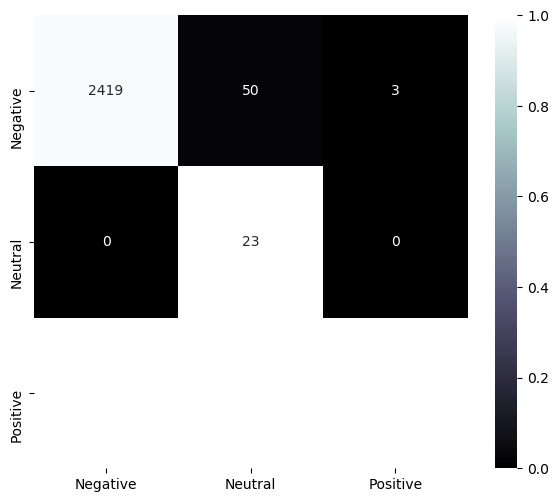

In [327]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(cm, ['Negative', 'Neutral', 'Positive'])

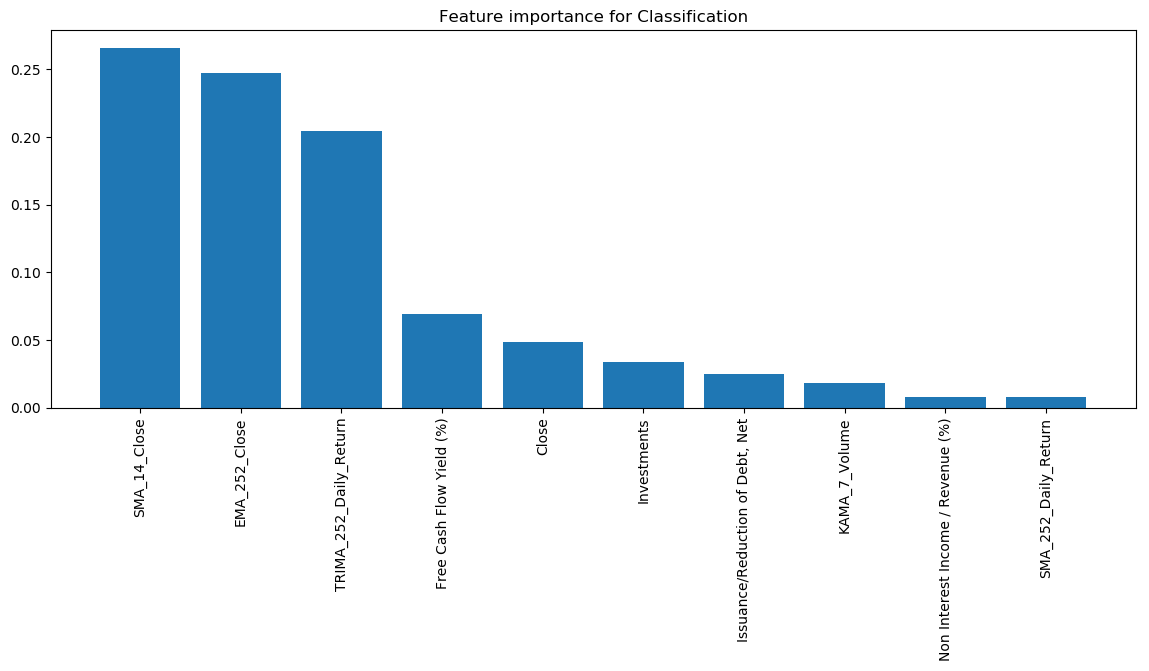

In [301]:
feature_importance = model.feature_importances_.tolist()
import operator
#x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
#sorted_x = sorted(x.items(), key=operator.itemgetter(1))


f = dict()
n = len(feature_importance)
for i in range (n):
    f[X_test.columns[i]] = feature_importance[i]
f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
f = f[:10]
feature_name = list()
feature_values = list()
for i, j in f:
    feature_name.append(i)
    feature_values.append(j)
'''
for i in sorted (f.values(), reverse = True) :  
     print(i, end = " ") 
'''
'''
print (type(xgbModel.feature_importances_))
feature_importance = xgbModel.feature_importances_.tolist()
feature_importance = sorted(feature_importance)
print (feature_importance)
'''

fig = plt.figure(figsize=(14,5))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(f))], feature_values, tick_label=feature_name)
plt.title('Feature importance for Classification')
plt.show()
